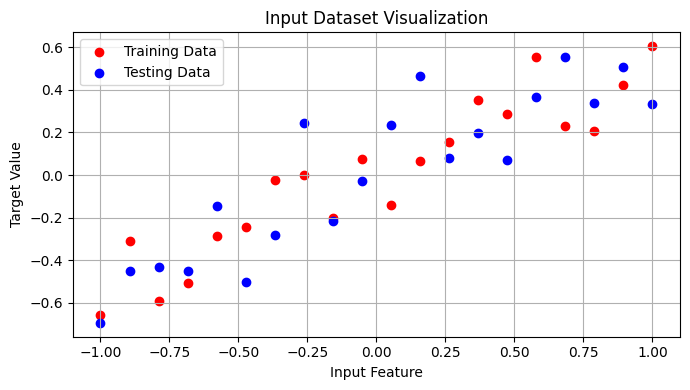

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare synthetic dataset
X_train = np.linspace(-1, 1, 20)
y_train = np.array([
    -0.6561, -0.3099, -0.59035, -0.50855, -0.285,
    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
    0.5524, 0.23115, 0.20835, 0.4211, 0.60485
])
X_test = np.linspace(-1, 1, 20)
y_test = np.array([
    -0.69415, -0.451, -0.43005, -0.4484, -0.1475,
    -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
    0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
    0.3639, 0.5536, 0.3365, 0.50705, 0.33435
])

# Plot training vs. testing data
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.title('Input Dataset Visualization')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.title('Input Dataset Visualization')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save before showing
image_path = "Input Dataset Visualization.png"
plt.savefig(image_path, dpi=300)  # Save before plt.show()
# Close the plot
plt.close()

# 📊 Baseline Model: Without Dropout

In [2]:
model_baseline = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model_baseline.compile(optimizer=Adam(0.01), loss='mse', metrics=['mse'])

history_baseline = model_baseline.fit(
    X_train, y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    verbose=0
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 🔐 Dropout-Regularized Model

In [3]:
model_dropout = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_dropout.compile(optimizer=Adam(0.01), loss='mse', metrics=['mse'])

history_dropout = model_dropout.fit(
    X_train, y_train,
    epochs=500,
    validation_data=(X_test, y_test),
    verbose=0
)


# 📈 Performance Comparison

In [4]:
# Evaluate both models
_, mse_train_base = model_baseline.evaluate(X_train, y_train, verbose=0)
_, mse_test_base = model_baseline.evaluate(X_test, y_test, verbose=0)
_, mse_train_drop = model_dropout.evaluate(X_train, y_train, verbose=0)
_, mse_test_drop = model_dropout.evaluate(X_test, y_test, verbose=0)

print(f"Baseline Model - Train MSE: {mse_train_base:.4f}, Test MSE: {mse_test_base:.4f}")
print(f"Dropout Model  - Train MSE: {mse_train_drop:.4f}, Test MSE: {mse_test_drop:.4f}")


Baseline Model - Train MSE: 0.0028, Test MSE: 0.0445
Dropout Model  - Train MSE: 0.0105, Test MSE: 0.0397


# 📉 Training Loss Curves

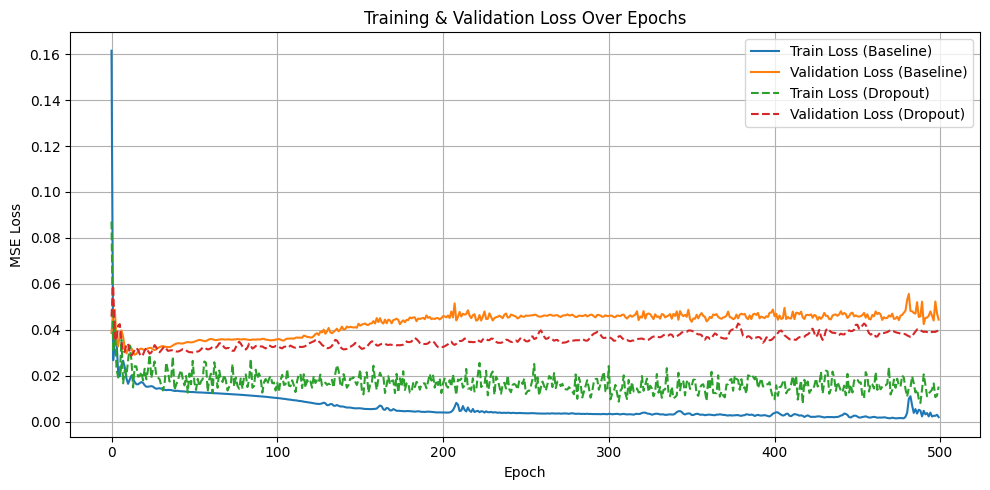

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history_baseline.history['loss'], label='Train Loss (Baseline)')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss (Baseline)')
plt.plot(history_dropout.history['loss'], label='Train Loss (Dropout)', linestyle='--')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (Dropout)', linestyle='--')
plt.title('Training & Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save before showing
image_path = "training_validation_loss_comparison.png"
plt.savefig(image_path, dpi=300)

# Show and close
plt.show()
plt.close()

# 🔍 Model Predictions Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


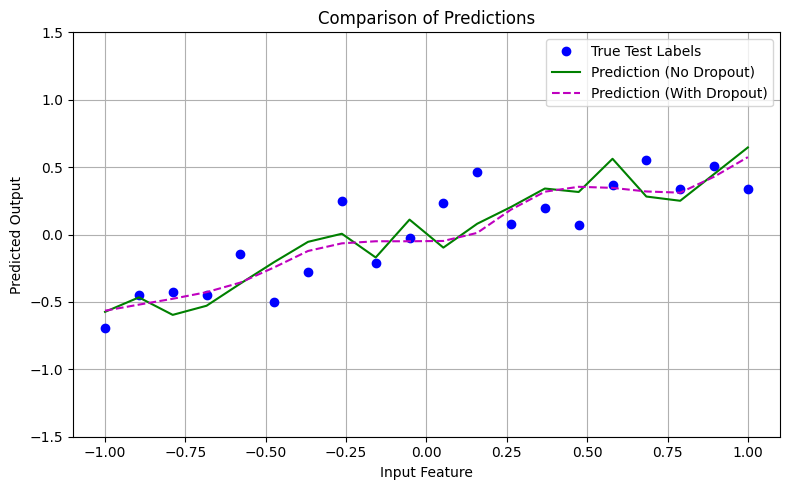

In [10]:
# Predictions
y_pred_base = model_baseline.predict(X_test)
y_pred_drop = model_dropout.predict(X_test)

# Plot and save
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, 'bo', label='True Test Labels')
plt.plot(X_test, y_pred_base, 'g-', label='Prediction (No Dropout)')
plt.plot(X_test, y_pred_drop, 'm--', label='Prediction (With Dropout)')
plt.title('Comparison of Predictions')
plt.xlabel('Input Feature')
plt.ylabel('Predicted Output')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True)
plt.tight_layout()

# ✅ Save BEFORE showing
image_path = "prediction_comparison.png"
plt.savefig(image_path, dpi=300)

# ✅ Then show and close
plt.show()
plt.close()
